In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from  sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint


In [ ]:
df=pd.read_csv("/content/marketing_campaign.csv")

In [ ]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [ ]:
df.shape

(365, 17)

In [ ]:
df.dtypes

,0
Date,object
Facebook Ad Campaign,object
Facebook Ad Views,int64
Facebook Ad Clicks,int64
Facebook Ad Conversions,int64
Cost per Facebook Ad,object
Facebook Click-Through Rate (Clicks / View),object
Facebook Conversion Rate (Conversions / Clicks),object
Facebook Cost per Click (Ad Cost / Clicks),object
AdWords Ad Campaign,object


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


Research Question
1. Which ad platform is more effective in terms of conversions, click and overall cost effectiveness?

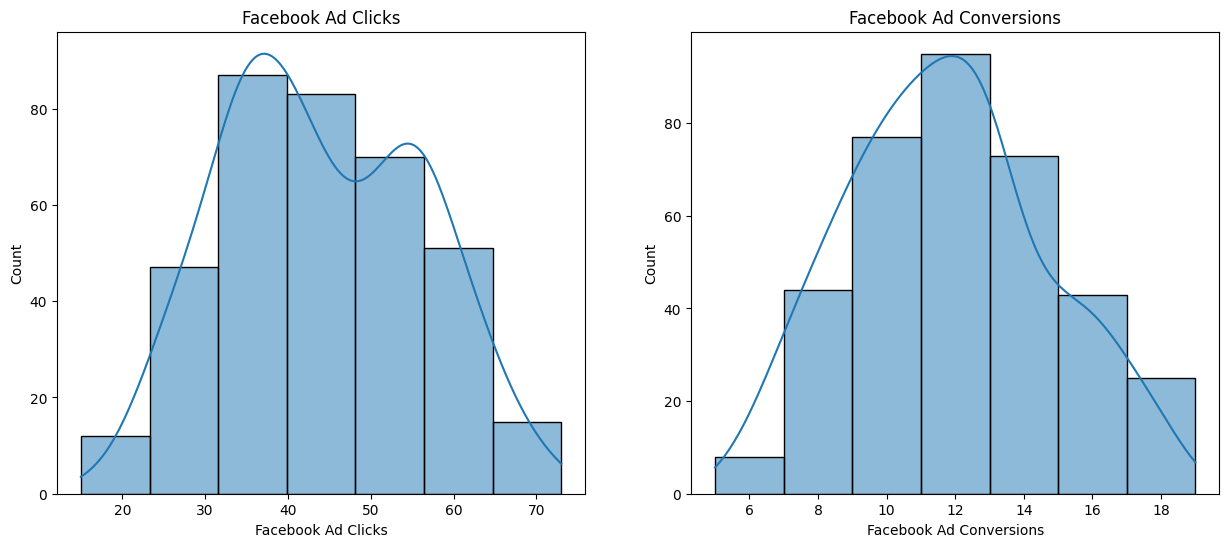

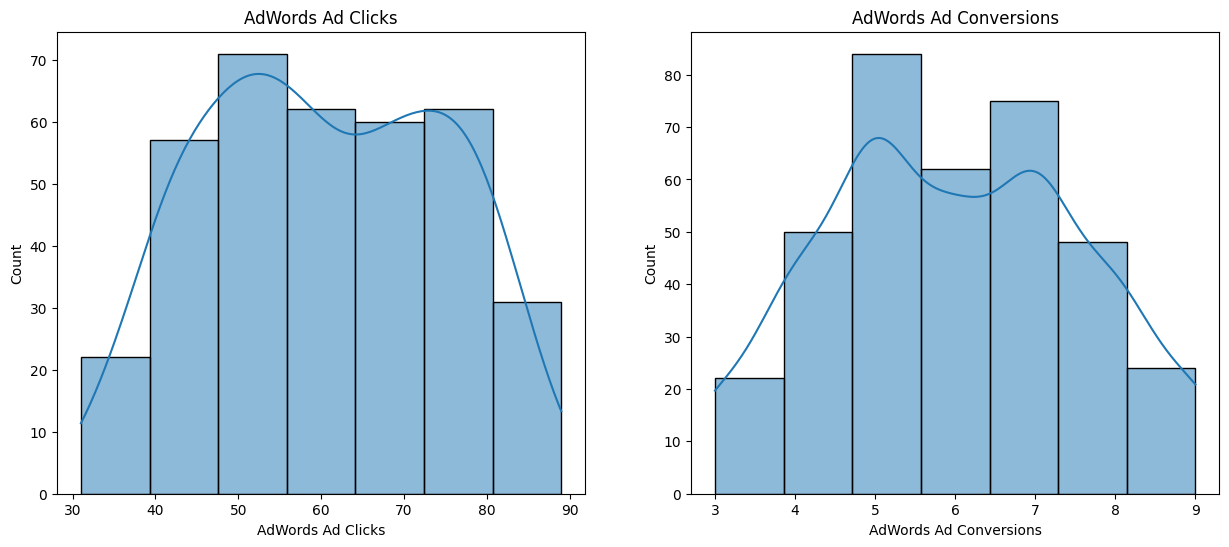

In [ ]:
#distrubution of the clicks and convertions
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'],bins=7, edgecolor='k',kde=True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'],bins=7,edgecolor='k',kde=True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'],bins=7, edgecolor='k',kde=True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'],bins=7,edgecolor='k',kde=True)
plt.show()

All the histogram are showing somewhat symmetrical shape. This symmetrical shape suggests that the number of clicks and conversions is relatively evenly distributed. In other words, there are not many clicks or conversions that are outliers on either the high or low end.



2. How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [ ]:
def create_conversion_category(conversion_col):
   category=[]
   for conversion in df[conversion_col]:
          if conversion < 6:
            category.append("less than 6")
          elif 6<= conversion <11:
            category.append("6-11")
          elif 11<= conversion <16:
            category.append("11-15")
          else:
            category.append('more than 15')
   return category


#apply
df['Facebook conversions category'] =create_conversion_category('Facebook Ad Conversions')
df['AdWords conversions category'] = create_conversion_category("AdWords Ad Conversions")

In [ ]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook conversions category,AdWords conversions category
0,2019-01-01,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6-11,less than 6
1,2019-01-02,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05,11-15,6-11
2,2019-01-03,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23,6-11,less than 6
3,2019-01-04,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86,6-11,less than 6
4,2019-01-05,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40,6-11,6-11


In [ ]:
facebook=pd.DataFrame(df['Facebook conversions category'].value_counts()).reset_index().rename(columns={'Facebook conversions category':'Category'})
facebook

,Category,count
0,11-15,189
1,6-11,128
2,more than 15,47
3,less than 6,1


In [ ]:
AdWords= pd.DataFrame(df['AdWords conversions category'].value_counts().reset_index().rename(columns={'AdWords conversions category':"Category"}))
AdWords

,Category,count
0,6-11,209
1,less than 6,156


In [ ]:
category_df=pd.merge(facebook,AdWords,on='Category',how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,11-15,189,0.0
1,6-11,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [ ]:
category_df=category_df.iloc[[2,1,0,3]]
category_df

,Category,count_x,count_y
2,less than 6,1,156.0
1,6-11,128,209.0
0,11-15,189,0.0
3,more than 15,47,0.0


In [ ]:
x_axis=np.arange(len(category_df))

In [ ]:
x_axis

array([0, 1, 2, 3])

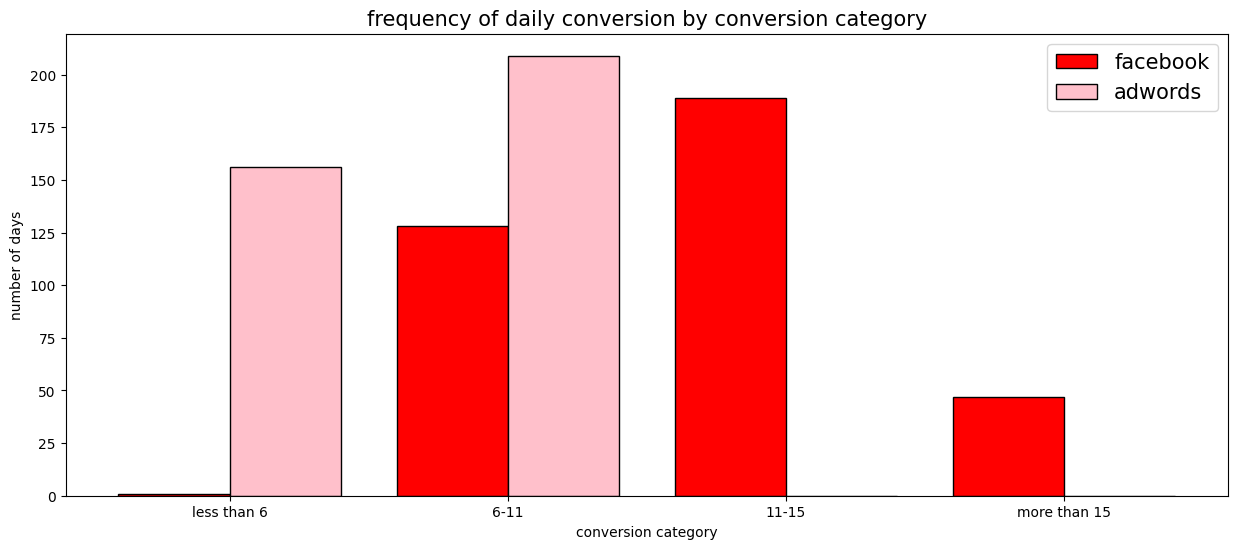

In [ ]:
x_axis=np.arange(len(category_df))
plt.figure(figsize=(15,6))
plt.bar(x_axis - 0.2,category_df["count_x"],0.4,label="facebook", color="red",linewidth=1,edgecolor='k')
plt.bar(x_axis + 0.2, category_df['count_y'],0.4,label='adwords',color='pink',linewidth=1,edgecolor='k')
plt.xticks(x_axis,category_df['Category'])
plt.xlabel("conversion category")
plt.ylabel("number of days")
plt.title("frequency of daily conversion by conversion category",fontsize=15)
plt.legend(fontsize=15)
plt.show()



* As data suggest facebook had more frequent higher conversion days than adwords.
* So there is significant varience in the number of high-conversion days betwen two different campaigns.




3.Do more clicks really lead to more sales?

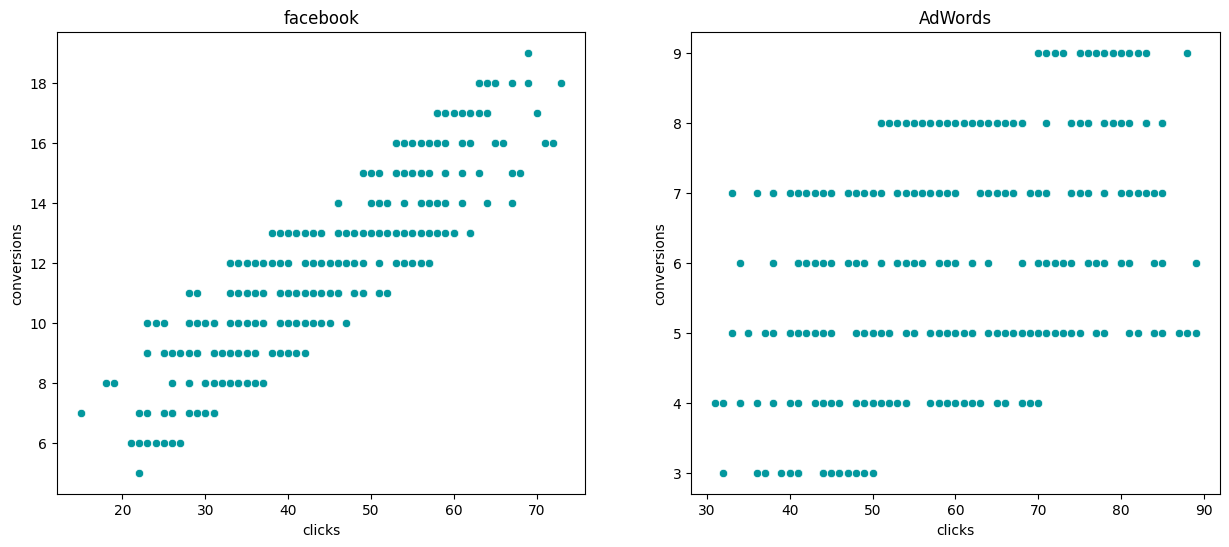

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#03989E')
plt.xlabel("clicks")
plt.ylabel("conversions")
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x=df['AdWords Ad Clicks'],y=df['AdWords Ad Conversions'], color='#03989E')
plt.xlabel('clicks')
plt.ylabel('conversions')
plt.show()

In [ ]:
facebook_corr=df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [ ]:
AdWords_corr=df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
AdWords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [ ]:
print('correlation coeff \n--------------')
print('Facebook :',round(facebook_corr.values[0,1],2))
print("AdWords :",round(AdWords_corr.values[0,1],2))

correlation coeff 
--------------
Facebook : 0.87
AdWords : 0.45




* A correlation coefficient of 0.87 indicates a strongs positive linear relationship between facebook ads and sales. this suggest that as the number of clicks on facebook ads increase , sales tends to increase as well. So a large portion of the variation in the sales can be explained by the varieation in the facebook ads.

* This suggest that increase in investment in the facebook ads or optimise this performance counld potentially lead to even higher sales.

* While moderate correlation coefficient of 0.45 indicates a moderate positive linear relationship between clicks on AdWords Ads and sales, its effectiveness may be influenced by other factors.



4. HYPOTHESIS TESTING


hypothesis: advertising on facebook will result in a greater number of conversions compared to advertising on AdWords

NUll Hypothesis (H0): there is diff in conversions between the facebook and adwords , or the number of conversions from adwords is greater than or equal to those from facebook.

H0: U_Facebook <= U_AdWords

Alternate Hypothesis(H1): the number of conversions from facebook is greater than the number of conversions form adwords.

H1: U_facebook > U_Adwords

In [ ]:
print('mean conversions \n---------')
print("Facebook :",round(df['Facebook Ad Conversions'].mean(),2))
print("AdWords :",round(df['AdWords Ad Conversions'].mean(),2))
t_statics,p_value = st.ttest_ind(a= df['Facebook Ad Conversions'],b=df['AdWords Ad Conversions'],equal_var=False)
print('\nT statics',t_statics, '\np_value',p_value)

if p_value < 0.05:
  print("\np_value is less than the significance value, Rejest the null hypothesis")
else:
  print("\np_value is greater than the significance value, Accept the null hypothesis ")

mean conversions 
---------
Facebook : 11.74
AdWords : 5.98

T statics 32.88402060758184 
p_value 9.348918164530465e-134

p_value is less than the significance value, Rejest the null hypothesis



- The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.

- The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.

- The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.

- The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.

- Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.





5. What will happen when i do go with the facebook ad? How many facebook ad conversions can i expect given a certain number of facebook ad clicks?

REGRESSION ANALYSIS

In [ ]:
# independent variable
x= df[['Facebook Ad Clicks']]
# dependent varialbe
y= df[['Facebook Ad Conversions']]

reg_model=LinearRegression()
reg_model.fit(x,y)
predict=reg_model.predict(x)

#model_evaluation
r2 =r2_score(y, predict)*100
mse=mean_squared_error(y,predict)
print('Accuracy (R2_score):', round(r2,2),'%')
print("Mean Squred error:", round(mse,2))

Accuracy (R2_score): 76.35 %
Mean Squred error: 2.02


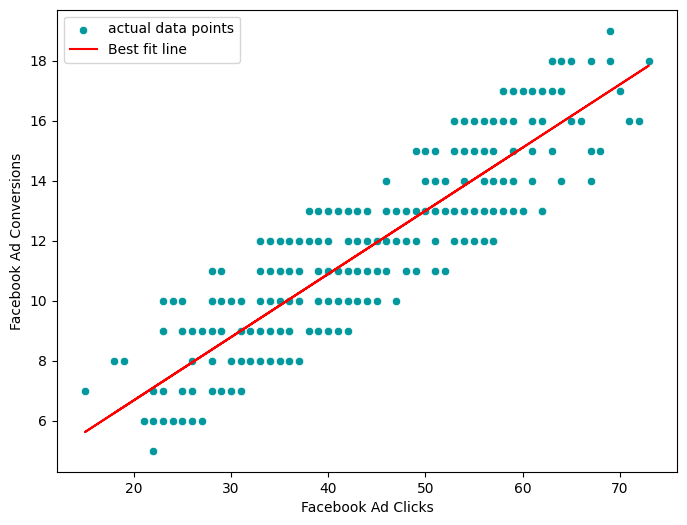

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Facebook Ad Clicks'],y=df['Facebook Ad Conversions'],color='#03989E', label="actual data points")
plt.plot(df['Facebook Ad Clicks'],predict,color='red', label="Best fit line")
plt.legend()
plt.show()

In [ ]:
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0],2)}')

For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


-So This model has a reasonably good predictive power, with an R2 score of 76.35%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.
- With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.
- For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.

6. Analysis Faceboook Comapaign metrics over time.

In [ ]:
#cleaning data
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float (x[1:]))

In [ ]:
# filtering for facebook campaign
df = df[['Date','Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


7. At what times of the month or days the week do we observe the conversions?

In [ ]:
df["Month"]= df['Date'].dt.month
df['week']= df['Date'].dt.weekday

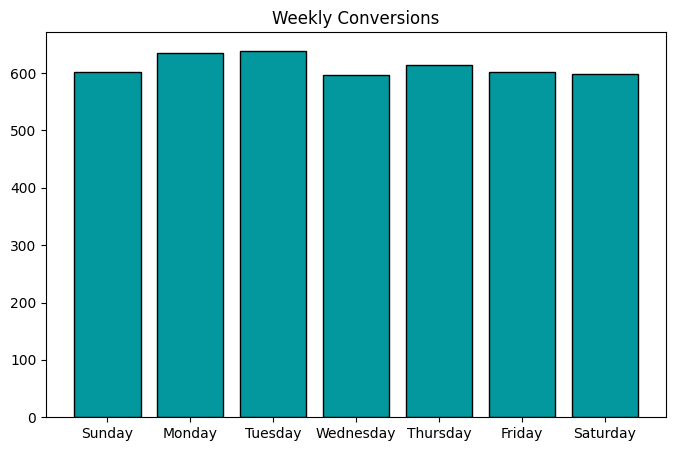

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = '#03989E', edgecolor = 'k')
plt.show()

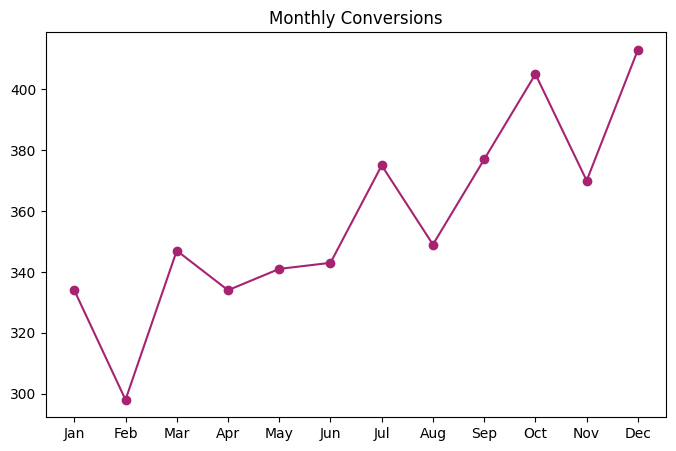

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('Month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'],'-o', color = '#A62372')
plt.show()

* **Weekday Trends**: Conversions are steady throughout the week, with **Mondays and Tuesdays showing the highest conversion rates**, indicating stronger user engagement at the start of the workweek.

* **Monthly Trends**: Overall, conversions show a **gradual upward trend** over the year. However, **February, April, May, June, August, and November** show noticeable **dips in conversions**, likely due to **seasonal effects**, **consumer behavior shifts**, or **marketing changes**.


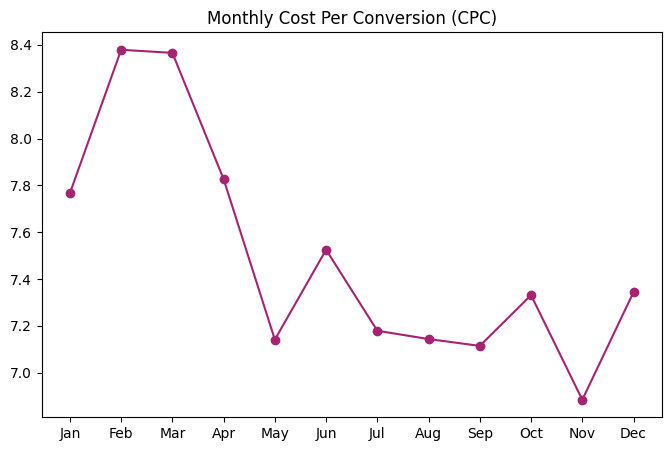

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby('Month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'],'-o', color = '#A62372')
lt.show()

8. Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [ ]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.755428385103219
P-value: 2.1337375979061323e-26

p-value is less than significance value, Reject the null hypothesis


Statistical Insight: A low p-value leads to rejection of the null hypothesis, confirming a long-term equilibrium relationship between advertising cost and conversions.

Business Implication: This relationship allows businesses to optimize ad spend by focusing on high-ROI campaigns and adjusting budgets based on performance, leading to maximum conversions at minimal cost.